Index(['nom_amenageur', 'siren_amenageur', 'contact_amenageur',
       'nom_operateur', 'contact_operateur', 'telephone_operateur',
       'nom_enseigne', 'id_station_itinerance', 'id_station_local',
       'nom_station', 'implantation_station', 'adresse_station',
       'code_insee_commune', 'coordonneesXY', 'nbre_pdc', 'id_pdc_itinerance',
       'id_pdc_local', 'puissance_nominale', 'prise_type_ef', 'prise_type_2',
       'prise_type_combo_ccs', 'prise_type_chademo', 'prise_type_autre',
       'gratuit', 'paiement_acte', 'paiement_cb', 'paiement_autre',
       'tarification', 'condition_acces', 'reservation', 'horaires',
       'accessibilite_pmr', 'restriction_gabarit', 'station_deux_roues',
       'raccordement', 'num_pdl', 'date_mise_en_service', 'observations',
       'date_maj', 'cable_t2_attache', 'last_modified', 'datagouv_dataset_id',
       'datagouv_resource_id', 'datagouv_organization_or_owner',
       'consolidated_longitude', 'consolidated_latitude',
       'consolidate

C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

(10044, 54)
(18511, 54)
(35561, 54)


C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i


(52306, 54)
(54954, 54)


C:\Users\kzf401\AppData\Local\Temp\ipykernel_16516\1478299383.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i


[68. 69. 49. 78. 38. 94. 92. 93. 84. 72. 33. 13. 79. 95. 75. 35. 34. 74.
 59. 77. 31. 21. 76. 62. 32. 26. 91. 54. 55. nan 17. 96. 47. 87. 19. 86.
 60. 57. 90.  3.  2. 22. 63. 36. 44. 73. 28. 64. 37. 14. 40. 52. 58. 89.
 30.  6. 83. 29. 16. 65. 42. 27. 24. 25. 67. 43. 85. 10. 71. 97.  4.  1.
  7. 50. 88. 66.  5. 18. 82. 41. 56.  8.  9. 53. 81. 80. 15. 48. 51. 61.
 39. 45. 11. 46. 12.  0. 70. 23.]


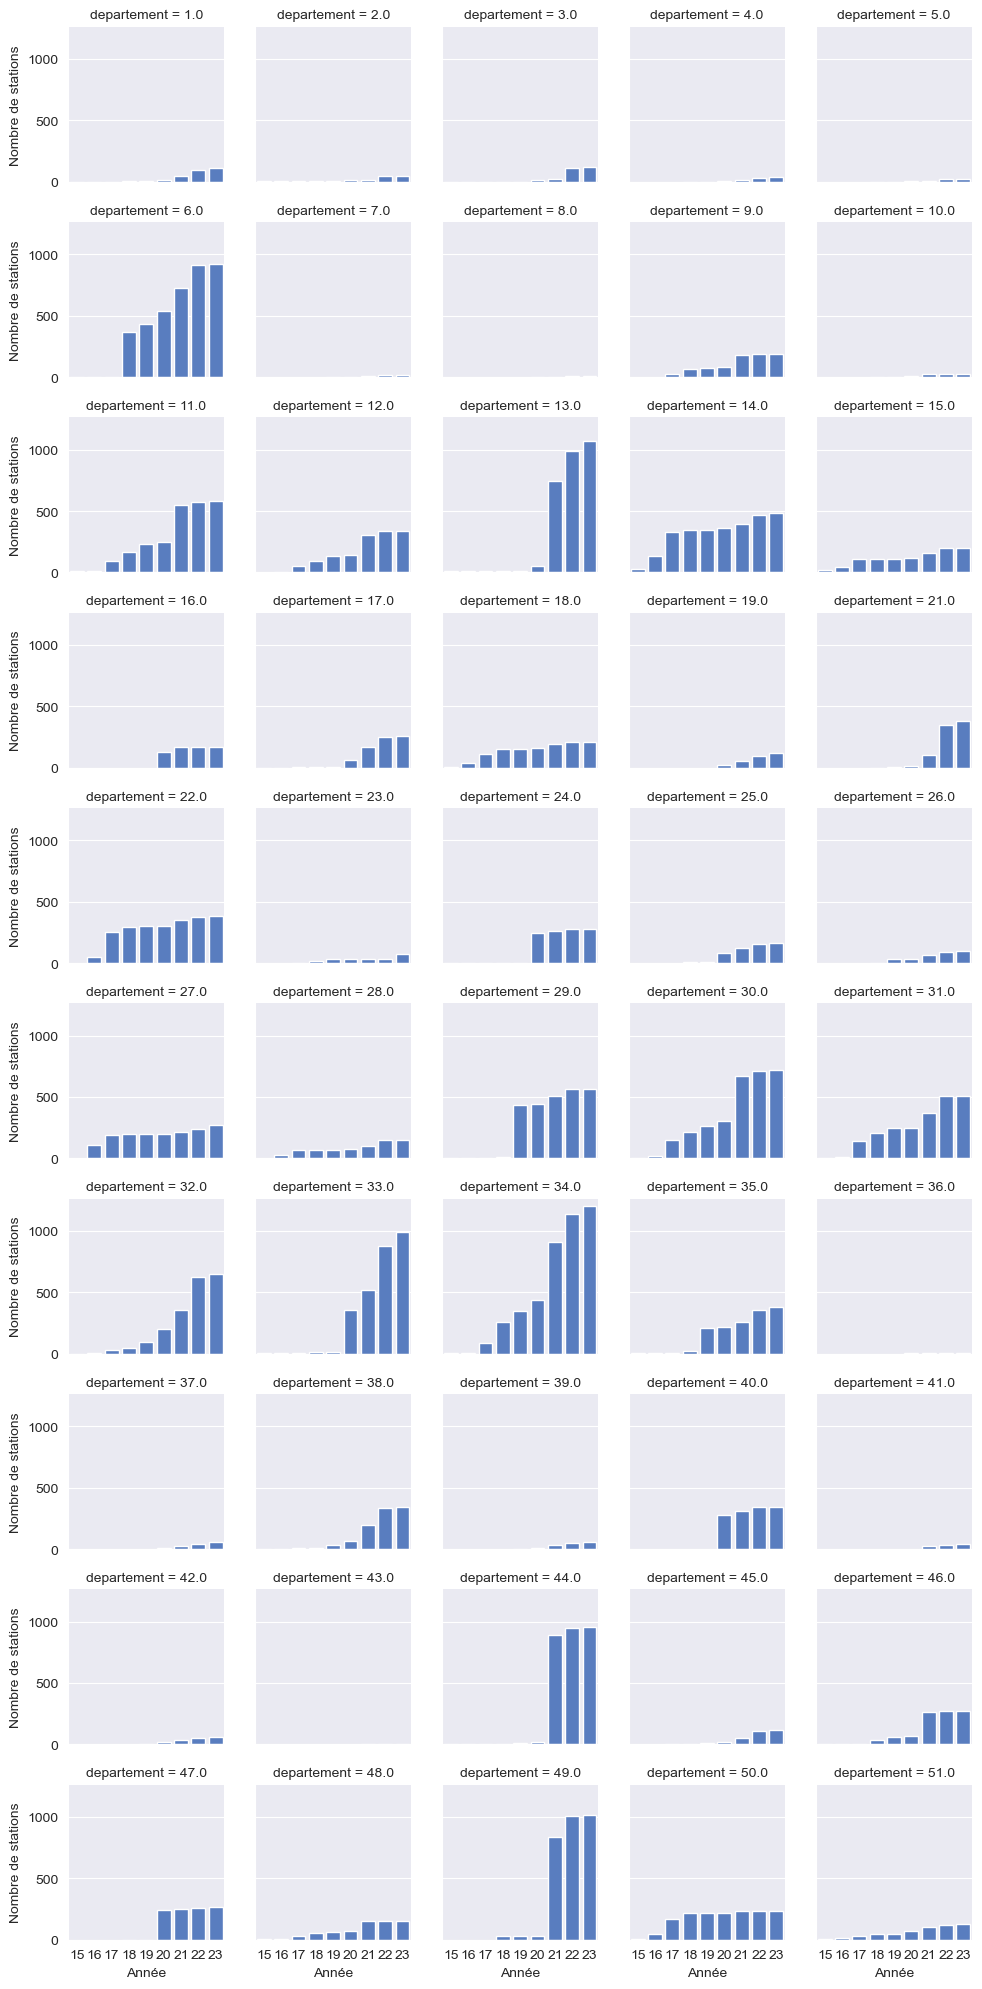

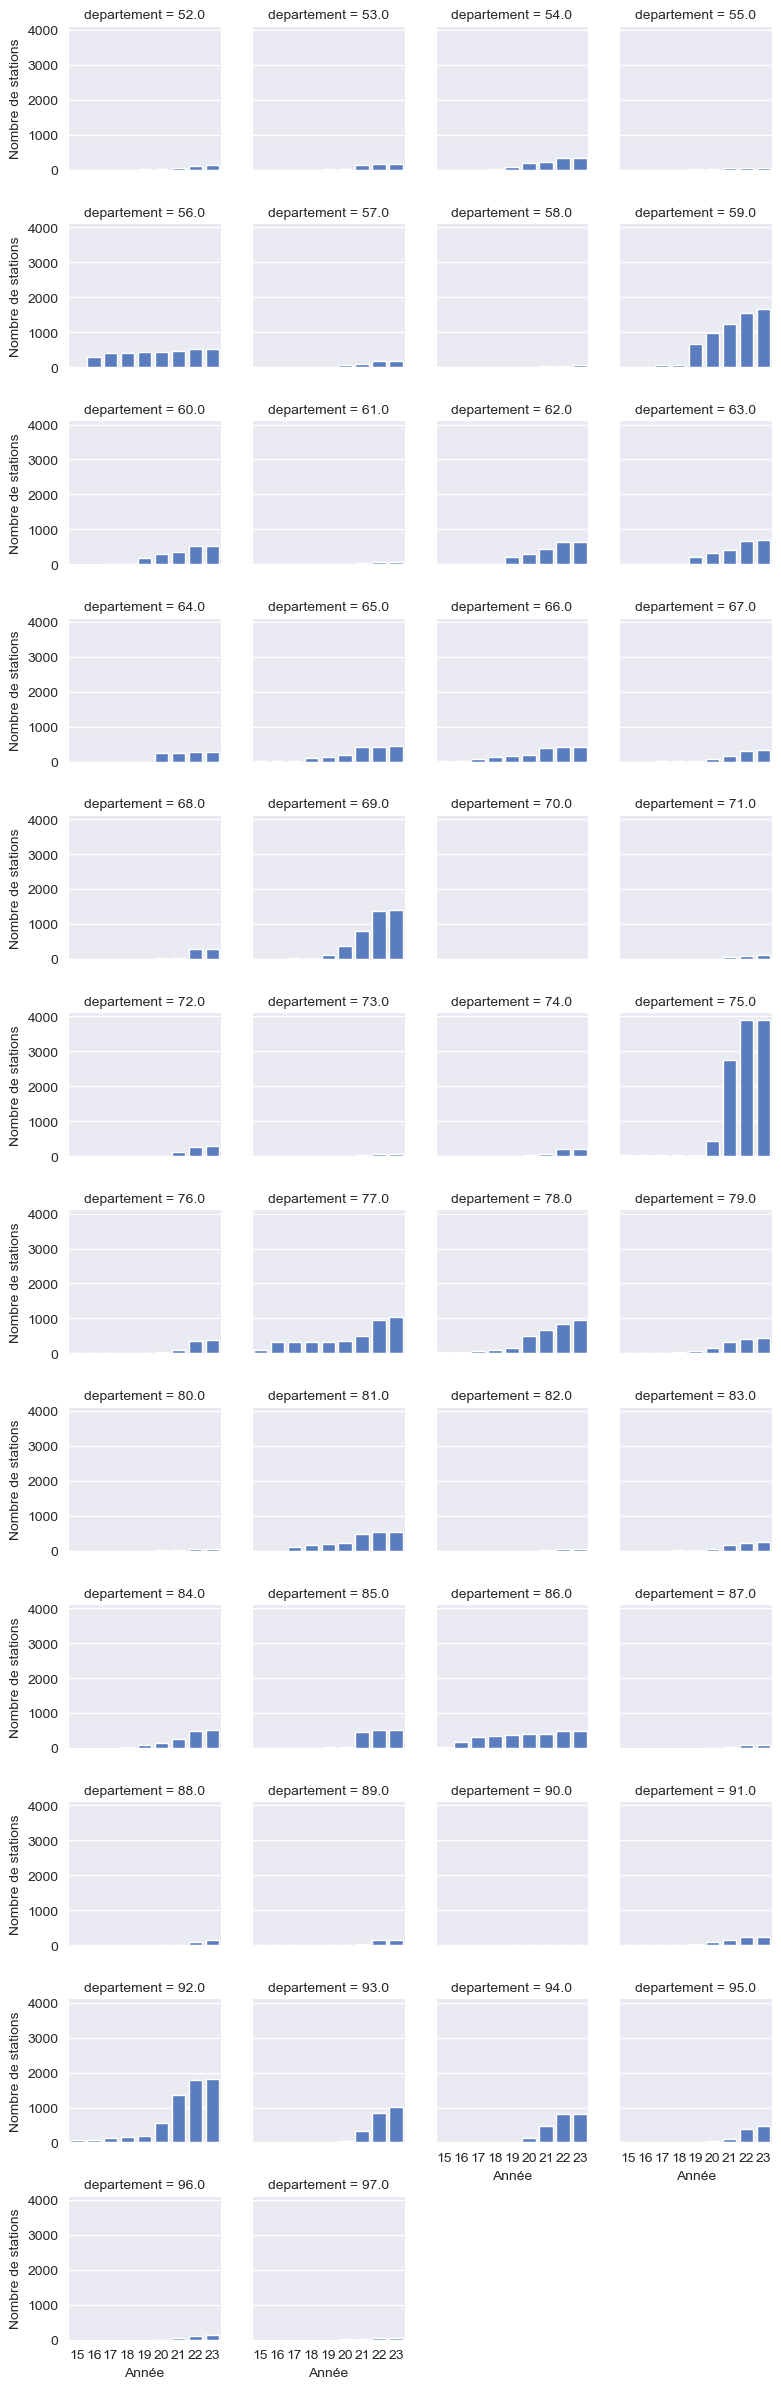

In [2]:
# Comment le nombre d’infrastructures de recharge évolue-t-il en France ?
# La répartition des infrastructures de recharge sur le territoire correspond-elle à une logique de distribution de la population et de trafic routier ?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Objectif: Suivre evolution des stations de rechargement par commune/ département/ autre.

# GIREVE: il semble que ce soit plusieurs petits datasets par opérateur.
#         Probablement doublon d'ETALAB (TBC)
# ENEDIS: Seulement somme totale au niveau national par trimestres depuis 2015
# Suite au commentaire de Fabien (ORDRE = ETALAB), je me concentre sur ETALAB.


# Display options
pd.set_option('display.max_columns', None)

## Data sur les bornes: Load ETALAB ET ORDRE
df_etalab = pd.read_csv(r"C:\Users\kzf401\Desktop\DS\D4G\raw_data\etalab_bornes.csv")
df_ordre = pd.read_excel(r"C:\Users\kzf401\Desktop\DS\D4G\raw_data\ordre_bornes.xlsx")

# Basic info
for df in [df_etalab, df_ordre]:
    print(df.columns)
    n_obs = len(df.index)
    print(n_obs)

    

# Exporter des fichiers excels avec le nombre de NA par variable pour chaque dataset 
path = r"C:\Users\kzf401\Desktop\DS\D4G\output\ "
names = ["etalab", "ordre"]
datasets = [df_etalab, df_ordre]
for name, df in zip(names, datasets):
    missing_obs_df = {}
    n_obs = len(df.index)
    for col in df:
        n_miss = df[col].isna().sum()
        perc_miss = (n_miss/n_obs)*100
        missing_obs_df[col] = n_miss, perc_miss   # Create Dict. of var. names + missing values
    missing_obs_df = pd.DataFrame.from_dict(missing_obs_df, orient='index', columns = ["n_miss", "perc_miss"])
    print(missing_obs_df)
    filename = f'missing_obs_{name}.xlsx'
    filepath = path + filename
    missing_obs_df.to_excel(filepath, index=True)
                            
        

### Créer un des données de panel avec toutes les bornes existantes pour chaque année 
# Je fais l'hypothese qu'aucune borne n'a été retirée après sa mise en service (pas de data sur les exits de bornes, seulement sur les entrées)

# 1. Chaque ligne du dataset ETALAB = 1 station
df_etalab["index1"] = df_etalab.index
    

# 2. Nettoyer la variable de temps
print(df_etalab["date_mise_en_service"].describe())
df_etalab["date_mise_en_service_dtformat"]=pd.to_datetime(df_etalab["date_mise_en_service"], errors = "coerce")
print(df_etalab["date_mise_en_service_dtformat"].isna().sum()) # 366 missing values after conversion: 345 missing, and 21 out of dt range, ok.
print(df_etalab["date_mise_en_service_dtformat"].head(20))


# 3. Créer une variable année de mise en service
df_etalab["year_mes"]= df_etalab["date_mise_en_service_dtformat"].dt.year
print(df_etalab["year_mes"].value_counts(sort=True)) 

    # Années avant 2015 <= 0.5% des observations --> Je fais commencer la time series a 2015 
    

# 4. Créer la liste de bornes existante par année, en commencant en 2015
# Règle: une borne est incluse dans la liste si sa mise en service est antérieure à l'année en question
    
df_etalab_panel = pd.DataFrame()
    
for i in range(2015, 2024): 
    df_etalab_i = df_etalab[df_etalab["year_mes"] <= i]
    df_etalab_i.loc[:,"year"] = i
    print(df_etalab_i.shape)
    df_etalab_panel = pd.concat([df_etalab_panel, df_etalab_i], sort=True, ignore_index=True)
    
    
# 5. Nettoyer les données de panel finales 
pd.set_option("min_rows", None)

    # Ordre des colonnes
index1 = df_etalab_panel.pop("index1")
df_etalab_panel.insert(0, 'index1', index1)
year = df_etalab_panel.pop("year")
df_etalab_panel.insert(1, 'year', year)

    # Ordre des lignes
df_etalab_panel = df_etalab_panel.sort_values(by=["index1", "year"])

    # Créer une variable de comptage 
df_etalab_panel["unit"] = 1
unit = df_etalab_panel.pop("unit")
df_etalab_panel.insert(0, 'unit', unit)

    # Ajouter une variable département
    # Pour le moment basée sur le code insee du dataset, mais 30% de N.A 
    # --> Comment merger les départements basé sur Coordonnées XY ?
df_etalab_panel['code_insee_commune'] = pd.to_numeric(df_etalab_panel['code_insee_commune'], errors='coerce')
df_etalab_panel["departement_t"] = df_etalab_panel["code_insee_commune"]*(1/1000)
df_etalab_panel["departement"] = df_etalab_panel["departement_t"].round(0)
print(df_etalab_panel["departement"].unique())


# 6. Créer les plots 
sns.set_style("darkgrid")
sns.set_color_codes("muted")

# Departements 1 a 50
data_plotg1 =df_etalab_panel[(df_etalab_panel["departement"]>0) & (df_etalab_panel["departement"]<=51)] 
g1 = sns.FacetGrid(data_plotg1, col="departement", col_wrap=5, height=2)
g1.map(sns.barplot, "year", "unit", order=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], estimator=sum, color='b')
g1.set_axis_labels("Année", "Nombre de stations")
g1.set_xticklabels([15, 16, 17, 18, 19, 20, 21, 22, 23])
  
# Departements 51 a 97
g2 = sns.FacetGrid(df_etalab_panel[df_etalab_panel["departement"]>51], col="departement", col_wrap=4, height=2)
g2.map(sns.barplot, "year", "unit", order=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], estimator=sum, color='b')
g2.set_axis_labels("Année", "Nombre de stations")
g2.set_xticklabels([15, 16, 17, 18, 19, 20, 21, 22, 23])



                                     n_miss  perc_miss
nom_amenageur                          3144   5.683297
siren_amenageur                       14488  26.189443
contact_amenageur                     14705  26.581706
nom_operateur                          3624   6.550976
contact_operateur                         0   0.000000
telephone_operateur                    6860  12.400578
nom_enseigne                              0   0.000000
id_station_itinerance                     0   0.000000
id_station_local                      26015  47.026392
nom_station                               0   0.000000
implantation_station                      0   0.000000
adresse_station                           0   0.000000
code_insee_commune                    16140  29.175705
coordonneesXY                             0   0.000000
nbre_pdc                                  0   0.000000
id_pdc_itinerance                         0   0.000000
id_pdc_local                          25927  46.867317
puissance_

(36594, 54)
(11478, 54)
(5404, 54)
(5153, 54)
(0, 54)
count          54975
unique          2256
top       2021-03-29
freq            1482
Name: date_mise_en_service, dtype: object
366
0    2022-09-22
1    2022-05-10
2    2022-08-09
3    2022-08-09
4    2022-08-09
5    2023-01-06
6    2023-01-06
7    2023-01-06
8    2023-01-06
9    2023-01-06
10   2023-01-06
11   2023-01-06
12   2023-01-06
13   2022-12-20
14   2022-12-20
15   2022-12-20
16   2022-12-20
17   2022-12-08
18   2022-12-08
19   2022-12-08
Name: date_mise_en_service_dtformat, dtype: datetime64[ns]
2021.0    17050
2022.0    16745
2020.0     8467
2019.0     3253
2017.0     3066
2023.0     2648
2018.0     2167
2016.0     1114
2000.0      247
2015.0      175
1970.0        7
1999.0        7
2014.0        6
2002.0        1
1976.0        1
Name: year_mes, dtype: int64


                nom_amenageur  siren_amenageur              contact_amenageur  \
0                     ELECTRA      891624884.0               help@electra.com   
1                     ELECTRA      891624884.0               help@electra.com   
2                     ELECTRA      891624884.0               help@electra.com   
3                     ELECTRA      891624884.0               help@electra.com   
4                     ELECTRA      891624884.0               help@electra.com   
...                       ...              ...                            ...   
55315            EVE CAR PLUG      879689750.0         contact@evecarplug.com   
55316           MA Borne Auto      880217922.0        e.barre@maborneauto.com   
55317  Societe Ouest Location      323873174.0  Axel.peigne@ouest-location.fr   
55318  Societe Ouest Location      323873174.0  Axel.peigne@ouest-location.fr   
55319  Societe Ouest Location      323873174.0  Axel.peigne@ouest-location.fr   

       nom_operateur       

C:\Users\kzf401\AppData\Local\Temp\ipykernel_29568\2130336666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_29568\2130336666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_29568\2130336666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

(444, 55)
(1558, 55)
(4624, 55)
(6791, 55)
(10044, 55)
(18511, 55)
(35561, 55)
(52306, 55)
(54954, 55)


C:\Users\kzf401\AppData\Local\Temp\ipykernel_29568\2130336666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i
C:\Users\kzf401\AppData\Local\Temp\ipykernel_29568\2130336666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etalab_i.loc[:,"year"] = i


[68. 69. 49. 78. 38. 94. 92. 93. 84. 72. 33. 13. 79. 95. 75. 35. 34. 74.
 59. 77. 31. 21. 76. 62. 32. 26. 91. 54. 55. nan 17. 96. 47. 87. 19. 86.
 60. 57. 90.  3.  2. 22. 63. 36. 44. 73. 28. 64. 37. 14. 40. 52. 58. 89.
 30.  6. 83. 29. 16. 65. 42. 27. 24. 25. 67. 43. 85. 10. 71. 97.  4.  1.
  7. 50. 88. 66.  5. 18. 82. 41. 56.  8.  9. 53. 81. 80. 15. 48. 51. 61.
 39. 45. 11. 46. 12.  0. 70. 23.]


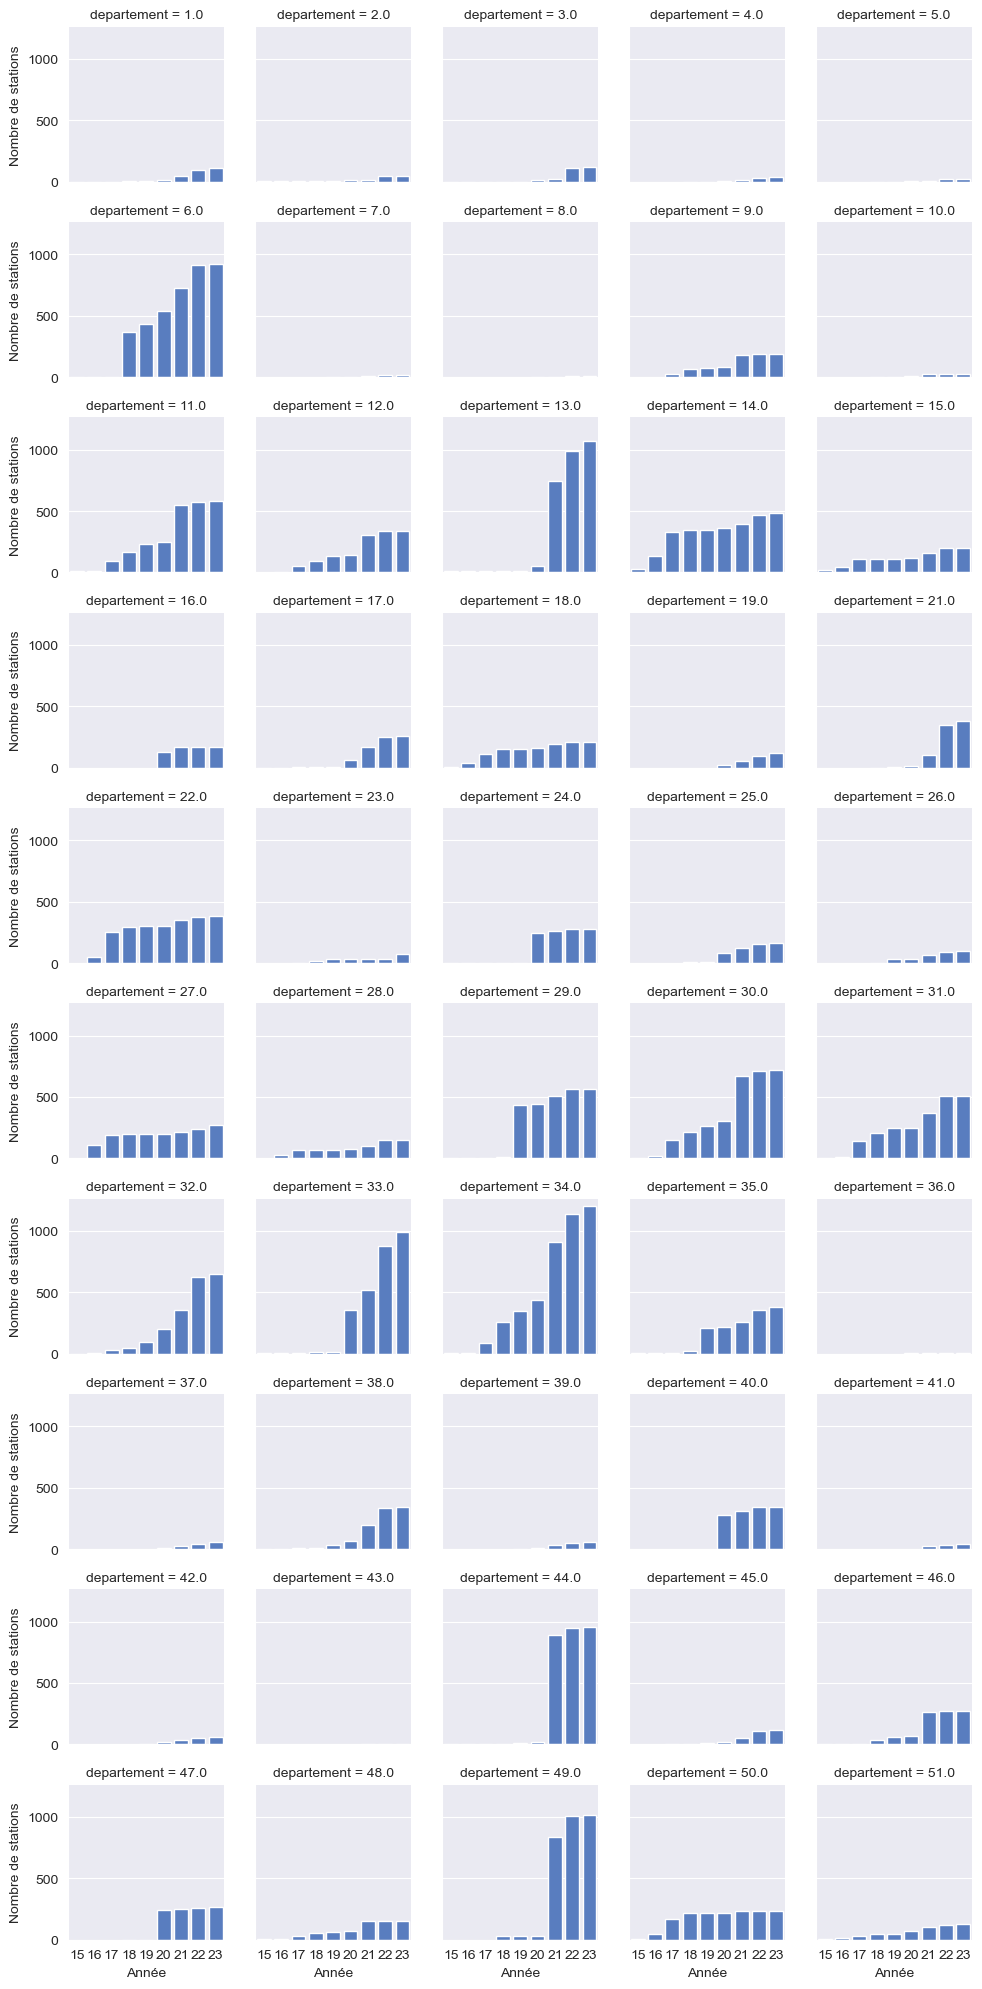

In [307]:



# https://seaborn.pydata.org/examples/index.html
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")
# Evolution du nombre de bornes au niveau national, régions, et département depuis 2015 sur différents plots.
# Repérer autres dimensions intéressantes puis discuter vendredi: implantation station, nombre_pdc, nom_operateur, type de paiement, type de prises, puissance, racordement, station deux-roues?
#plot = sns.catplot(kind="bar", y="unit", x="year", data=df_etalab_panel, estimator=sum, color='b')
#plot.set(ylabel="Nombre de stations", xlabel="Année", title="Evolution du nombre de stations dans le temps")


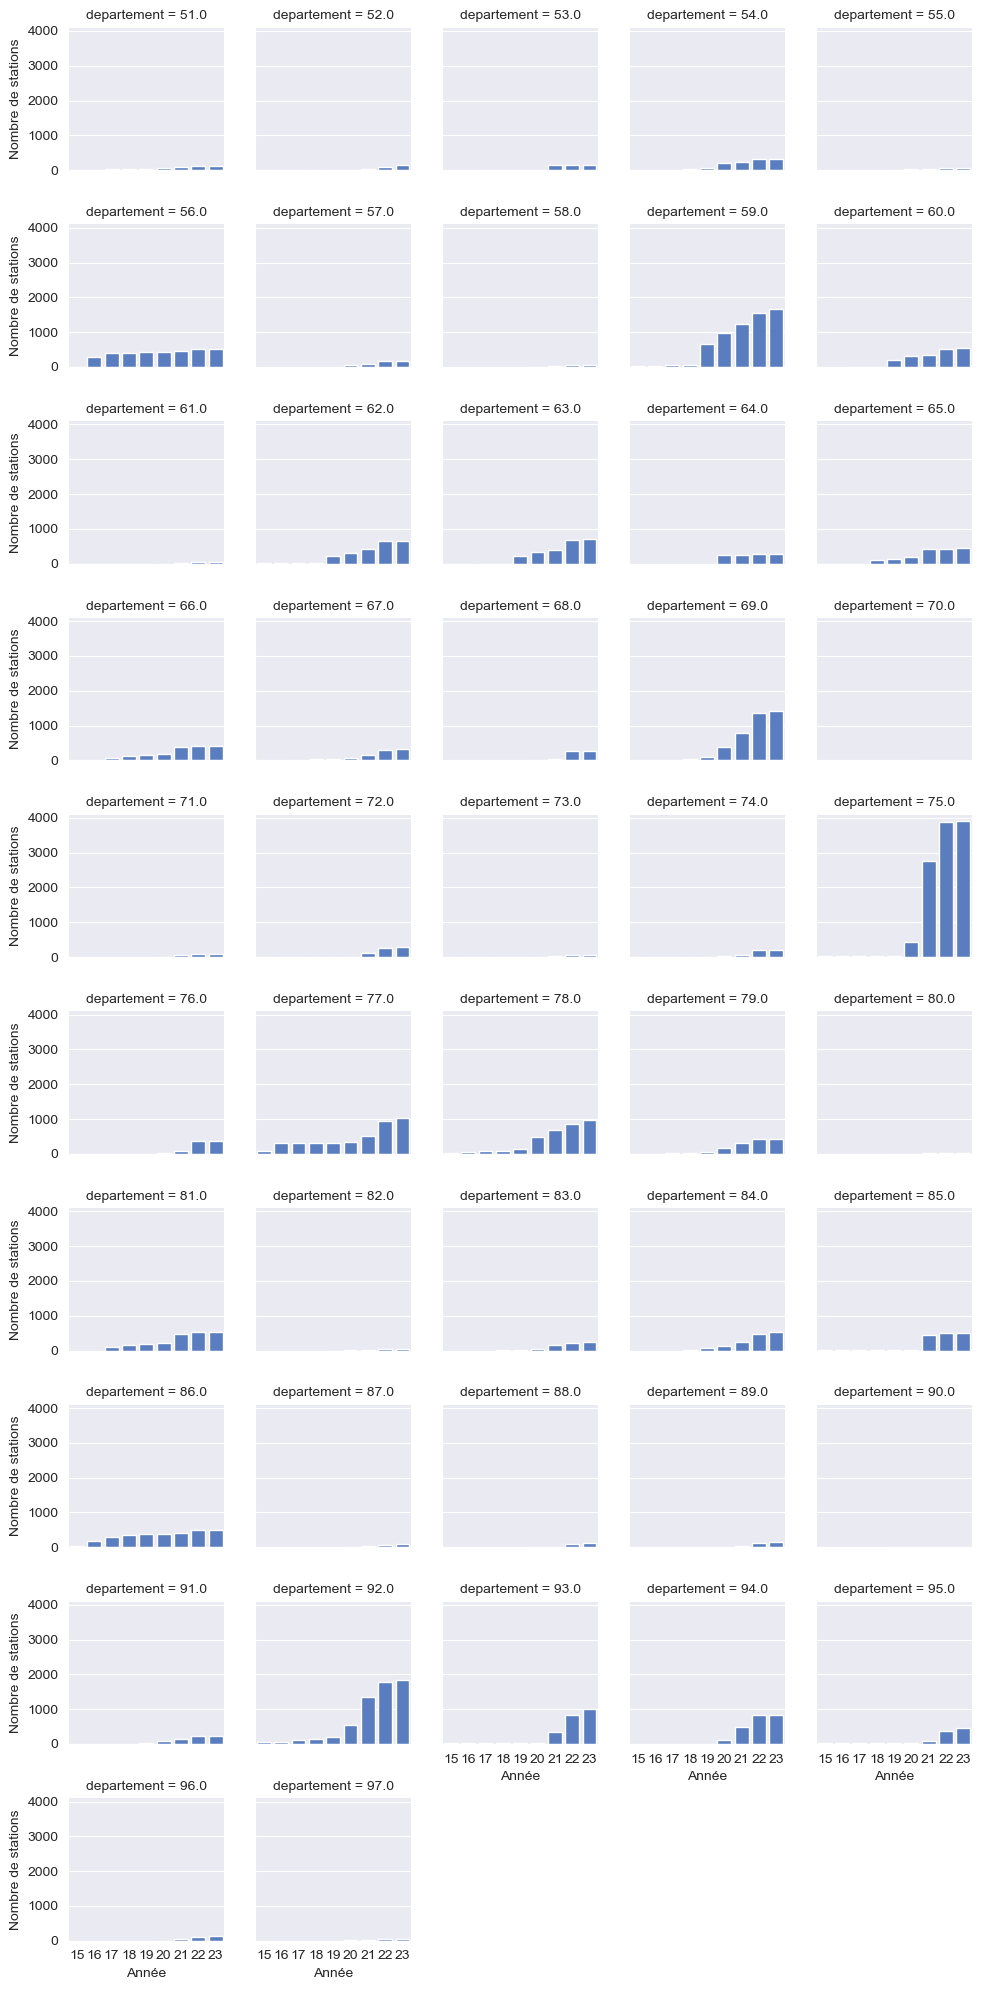